# PyTorch Basics and Multi-Layer Perceptrons (MLPs) Explained

## Setup

First, let's import the necessary libraries and set up our environment. We will use PyTorch for building and training neural networks, NumPy for numerical operations, and Matplotlib for plotting.

In [2]:
# Import the PyTorch library, which is the main library we'll be using for deep learning
import torch

# Import the neural network module from PyTorch, which provides building blocks for creating neural networks
import torch.nn as nn

# Import the optimization module from PyTorch, which contains various optimization algorithms
import torch.optim as optim

# Import the functional module from PyTorch, which contains various functions for neural networks
import torch.nn.functional as F

# Import the NumPy library for numerical operations (we might use this for data manipulation)
import numpy as np

# Import the Matplotlib library for plotting (we'll use this to visualize our results)
import matplotlib.pyplot as plt

# Set a random seed for PyTorch to ensure reproducibility
# This means that random operations will give the same results each time we run the code
torch.manual_seed(42)

# Set a random seed for NumPy to ensure reproducibility
# This is similar to the PyTorch seed, but for NumPy operations
np.random.seed(42)

# Check if CUDA (GPU support) or Apple sillicon is available and set the device accordingly
# This line creates a 'device' object that we'll use to tell PyTorch where to run our computations
device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda" if torch.cuda.is_available()
    else "cpu"
)

# Print the device being used (CPU or GPU)
# This helps us confirm whether we're using GPU acceleration or not
print(f"Using device: {device}")

Using device: cuda


## 1. Introduction to PyTorch and Tensors

PyTorch is a powerful library for machine learning, especially deep learning. It's like a toolbox full of useful tools for building and training neural networks. PyTorch is widely used in both academia and industry due to its flexibility and ease of use.

The most basic building block in PyTorch is called a **tensor**. You can think of a tensor as a container for numbers, similar to a list or an array in other programming languages. The cool thing about tensors is that they can have multiple dimensions, making them perfect for representing complex data like images or text. Tensors are also optimized for GPU acceleration, which makes them very efficient for large-scale computations.

### Creating Tensors

In [3]:
# Import the PyTorch library, which we'll use to create and manipulate tensors
import torch

# Create a 1D tensor (vector) with values [1, 2, 3, 4, 5]
# A 1D tensor is like a list of numbers
vector = torch.tensor([1, 2, 3, 4, 5])

# Create a 2D tensor (matrix) with values [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
# A 2D tensor is like a table of numbers with rows and columns
matrix = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Create a 3D tensor with values [[[1, 2], [3, 4]], [[5, 6], [7, 8]]]
# A 3D tensor is like a cube of numbers, or a stack of 2D matrices
tensor_3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

# We can print these tensors to see their contents:
print("1D tensor (vector):", vector)
print("2D tensor (matrix):", matrix)
print("3D tensor:", tensor_3d)

# We can also check the shape (dimensions) of each tensor:
print("Vector shape:", vector.shape)
print("Matrix shape:", matrix.shape)
print("3D tensor shape:", tensor_3d.shape)

1D tensor (vector): tensor([1, 2, 3, 4, 5])
2D tensor (matrix): tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
3D tensor: tensor([[[1, 2],
         [3, 4]],

        [[5, 6],
         [7, 8]]])
Vector shape: torch.Size([5])
Matrix shape: torch.Size([3, 3])
3D tensor shape: torch.Size([2, 2, 2])


In this example, we create tensors of different dimensions. The 1D tensor is like a list, the 2D tensor is like a table or matrix, and the 3D tensor is like a stack of 2D matrices. Understanding these different dimensions is crucial because neural networks often work with high-dimensional data, such as images (which can be represented as 3D tensors) or batches of data (which can be represented as 4D tensors).

> **Intuition:** Think of tensors as flexible containers that can hold numbers in various shapes. A 1D tensor is like a line of numbers, a 2D tensor is like a grid of numbers, and a 3D tensor is like a cube of numbers.

> **Common Mistake:** Beginners often forget that PyTorch uses zero-based indexing. This means the first element of a tensor is accessed with index 0, not 1.

## 2. Tensor Operations and Matrix Math

Tensors aren't just for storing numbers; we can perform various operations on them. These operations are the building blocks of neural network computations.

### Basic Operations

In [4]:
# Create a 1D tensor 'a' with values [1, 2, 3]
a = torch.tensor([1, 2, 3])

# Create another 1D tensor 'b' with values [4, 5, 6]
b = torch.tensor([4, 5, 6])

# Perform element-wise addition of tensors a and b
# This adds corresponding elements: [1+4, 2+5, 3+6]
c = a + b  # Result: tensor([5, 7, 9])
print("Element-wise addition:", c)

# Perform element-wise multiplication of tensors a and b
# This multiplies corresponding elements: [1*4, 2*5, 3*6]
d = a * b  # Result: tensor([4, 10, 18])
print("Element-wise multiplication:", d)

# Create a 2D tensor (matrix) 'm1' with values [[1, 2], [3, 4]]
m1 = torch.tensor([[1, 2], [3, 4]])

# Create another 2D tensor (matrix) 'm2' with values [[5, 6], [7, 8]]
m2 = torch.tensor([[5, 6], [7, 8]])

# Perform matrix multiplication of tensors m1 and m2
# This is different from element-wise multiplication!
m3 = torch.matmul(m1, m2)  # Result: tensor([[19, 22], [43, 50]])
print("Matrix multiplication:", m3)

# Let's break down the matrix multiplication:
# [1 2] * [5 6] = 1*5 + 2*7 = 19  |  1*6 + 2*8 = 22
# [3 4]   [7 8]   3*5 + 4*7 = 43  |  3*6 + 4*8 = 50

# We can also use the '@' operator for matrix multiplication:
m4 = m1 @ m2
print("Matrix multiplication using @:", m4)

# Verify that m3 and m4 are the same
print("Are m3 and m4 equal?", torch.all(m3 == m4))

Element-wise addition: tensor([5, 7, 9])
Element-wise multiplication: tensor([ 4, 10, 18])
Matrix multiplication: tensor([[19, 22],
        [43, 50]])
Matrix multiplication using @: tensor([[19, 22],
        [43, 50]])
Are m3 and m4 equal? tensor(True)


These operations allow us to manipulate tensors in various ways, which is crucial for building and training neural networks. For example, matrix multiplication is a fundamental operation in neural networks, as it is used in the forward pass to compute the activations of neurons. Understanding these operations will help you implement and debug neural network models more effectively.

> **Intuition:** Think of tensor operations as ways to combine or transform the numbers inside tensors. Addition is like combining two sets of numbers, while matrix multiplication is a more complex way of combining numbers that's especially useful in neural networks.

> **Common Mistake:** Beginners often confuse element-wise multiplication (*) with matrix multiplication (torch.matmul or @). Make sure you use the right operation for your task!

## 3. Building Blocks of Neural Networks

Neural networks are made up of several key components. Let's explore each one:

### Linear Layers

A linear layer performs a linear transformation on the input data. It's like applying a mathematical function y = mx + b to each input.

In [5]:
# Import the neural network module from PyTorch
import torch.nn as nn

# Create a linear layer that takes 10 input features and produces 5 output features
linear = nn.Linear(in_features=10, out_features=5)

# A linear layer performs the operation: y = xW^T + b
# Where x is the input, W is the weight matrix, and b is the bias vector

# We can inspect the parameters of our linear layer:
print("Weight matrix shape:", linear.weight.shape)  # Should be (5, 10)
print("Bias vector shape:", linear.bias.shape)      # Should be (5,)

# Let's create a sample input and pass it through our linear layer
sample_input = torch.randn(3, 10)  # 3 samples, each with 10 features
output = linear(sample_input)

print("Input shape:", sample_input.shape)
print("Output shape:", output.shape)  # Should be (3, 5)

# The output has 5 features for each of our 3 input samples

Weight matrix shape: torch.Size([5, 10])
Bias vector shape: torch.Size([5])
Input shape: torch.Size([3, 10])
Output shape: torch.Size([3, 5])


This creates a linear layer that takes 10 input features and produces 5 output features. Linear layers are the building blocks of neural networks. They apply a linear transformation to the input data, which is essentially a weighted sum of the input features. This transformation allows the network to learn relationships between the input features and the target output.

### Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns.

ReLU output: tensor([0, 0, 0, 1, 2])
Sigmoid output: tensor([0.1192, 0.2689, 0.5000, 0.7311, 0.8808])
Tanh output: tensor([-0.9640, -0.7616,  0.0000,  0.7616,  0.9640])


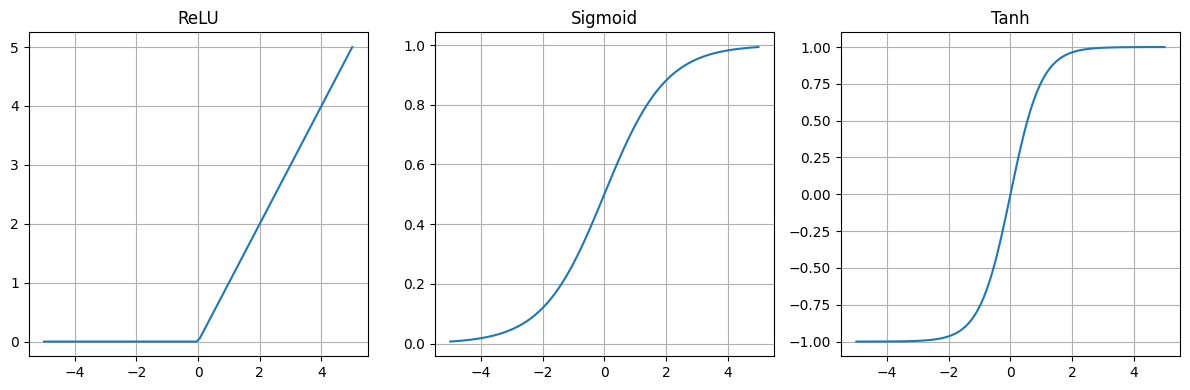

In [6]:
# Create a ReLU (Rectified Linear Unit) activation function
relu = nn.ReLU()

# Create a Sigmoid activation function
sigmoid = nn.Sigmoid()

# Create a Tanh (Hyperbolic Tangent) activation function
tanh = nn.Tanh()

# Let's create a sample input to test these activation functions
sample_input = torch.tensor([-2, -1, 0, 1, 2])

# Apply ReLU activation
relu_output = relu(sample_input)
print("ReLU output:", relu_output)
# ReLU replaces negative values with 0, and keeps positive values as they are

# Apply Sigmoid activation
sigmoid_output = sigmoid(sample_input)
print("Sigmoid output:", sigmoid_output)
# Sigmoid squashes values to the range (0, 1)

# Apply Tanh activation
tanh_output = tanh(sample_input)
print("Tanh output:", tanh_output)
# Tanh squashes values to the range (-1, 1)

# Let's visualize these activation functions
import matplotlib.pyplot as plt

x = torch.linspace(-5, 5, 100)
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.plot(x, relu(x))
plt.title('ReLU')
plt.grid(True)

plt.subplot(132)
plt.plot(x, sigmoid(x))
plt.title('Sigmoid')
plt.grid(True)

plt.subplot(133)
plt.plot(x, tanh(x))
plt.title('Tanh')
plt.grid(True)

plt.tight_layout()
plt.show()

These are different types of activation functions, each with its own characteristics. Activation functions introduce non-linearity into the network, which allows it to learn complex patterns in the data. Without activation functions, the network would only be able to learn linear relationships, which are not sufficient for most real-world tasks.

- ReLU (Rectified Linear Unit): Returns 0 for negative inputs, and the input itself for positive inputs.
- Sigmoid: Squashes inputs to a range between 0 and 1.
- Tanh: Squashes inputs to a range between -1 and 1.

> **Intuition:** Think of activation functions as decision-makers. They look at the input and decide how much of that information should be passed on to the next layer.

### Dropout

Dropout is a regularization technique that helps prevent overfitting by randomly "dropping out" (setting to zero) a proportion of neurons during training.

In [7]:
# Create a Dropout layer with a dropout probability of 0.5 (50%)
dropout = nn.Dropout(p=0.5)

# Dropout is a regularization technique to prevent overfitting
# During training, it randomly sets a fraction of input units to 0 at each update

# Let's create a sample input to demonstrate dropout
sample_input = torch.ones(10, 10)  # 10x10 tensor of ones

# Apply dropout during training
dropout.train()  # Set the layer to training mode
train_output = dropout(sample_input)
print("Output during training (with dropout):")
print(train_output)

# Notice that approximately half of the elements are zero

# During evaluation, dropout behaves differently
dropout.eval()  # Set the layer to evaluation mode
eval_output = dropout(sample_input)
print("\nOutput during evaluation (without dropout):")
print(eval_output)

# During evaluation, all elements remain unchanged

# It's important to set your model to train() mode during training
# and eval() mode during evaluation to ensure proper behavior of dropout

Output during training (with dropout):
tensor([[0., 2., 2., 0., 2., 0., 0., 2., 0., 0.],
        [2., 0., 2., 0., 2., 0., 2., 2., 2., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2., 2., 0.],
        [0., 2., 2., 2., 0., 2., 2., 0., 2., 2.],
        [0., 2., 2., 0., 0., 2., 2., 0., 2., 2.],
        [2., 2., 2., 0., 0., 2., 2., 0., 2., 2.],
        [0., 2., 0., 0., 0., 2., 2., 2., 0., 2.],
        [0., 2., 2., 2., 2., 2., 0., 2., 2., 0.],
        [2., 2., 2., 2., 0., 0., 2., 0., 0., 2.],
        [2., 2., 0., 0., 2., 2., 0., 2., 0., 2.]])

Output during evaluation (without dropout):
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1.

This creates a dropout layer that will randomly zero out 50% of the inputs during training. Dropout is a regularization technique that helps prevent overfitting by ensuring that the network does not rely too heavily on any single neuron. By randomly dropping out neurons during training, dropout forces the network to learn more robust features that generalize better to new data.

> **Common Question:** "Why do we need dropout?" Dropout helps the network learn more robust features by preventing it from relying too heavily on any particular neuron.

### Batch Normalization

Batch normalization normalizes the inputs to a layer for each mini-batch, which can help the network train faster and more stably.

In [8]:
# Create a Batch Normalization layer for inputs with 10 features
batch_norm = nn.BatchNorm1d(10)

# Batch Normalization normalizes the input to have zero mean and unit variance
# It helps in faster convergence and allows higher learning rates

# Let's create a sample batch of data to demonstrate batch normalization
sample_batch = torch.randn(32, 10)  # 32 samples, each with 10 features

# Apply batch normalization
normalized_batch = batch_norm(sample_batch)

print("Original batch mean:", sample_batch.mean(dim=0))
print("Original batch std:", sample_batch.std(dim=0))

print("\nNormalized batch mean:", normalized_batch.mean(dim=0))
print("Normalized batch std:", normalized_batch.std(dim=0))

# Notice that the normalized batch has mean close to 0 and std close to 1 for each feature

# Batch Normalization also has learnable parameters: weight and bias
print("\nBatch Norm weight:", batch_norm.weight)
print("Batch Norm bias:", batch_norm.bias)

# These parameters allow the layer to learn the optimal scale and shift for each feature

# Like dropout, batch normalization behaves differently during training and evaluation
# Make sure to set your model to train() mode during training and eval() mode during evaluation

Original batch mean: tensor([-0.2069, -0.0474,  0.0889,  0.3059,  0.1166,  0.1111,  0.1183,  0.1210,
        -0.1135, -0.0088])
Original batch std: tensor([1.0566, 0.7611, 0.8979, 0.8872, 0.9369, 0.9819, 0.9139, 0.7381, 0.9563,
        1.0122])

Normalized batch mean: tensor([ 3.7253e-09,  5.5879e-09,  1.4901e-08, -5.5879e-09, -2.6077e-08,
        -3.7253e-09, -7.4506e-09,  1.4901e-08,  7.4506e-09,  7.4506e-09],
       grad_fn=<MeanBackward1>)
Normalized batch std: tensor([1.0160, 1.0160, 1.0160, 1.0160, 1.0160, 1.0160, 1.0160, 1.0160, 1.0160,
        1.0160], grad_fn=<StdBackward0>)

Batch Norm weight: Parameter containing:
tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True)
Batch Norm bias: Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)


This creates a batch normalization layer for inputs with 10 features. Batch normalization normalizes the inputs to a layer for each mini-batch, which can help the network train faster and more stably. By normalizing the inputs, batch normalization reduces the internal covariate shift, which is the change in the distribution of layer inputs during training. This allows for higher learning rates and can lead to faster convergence.

## 4. Creating a Multi-Layer Perceptron (MLP)

Now that we understand the building blocks, let's put them together to create an MLP!

In [9]:
# Define a class for the Multi-Layer Perceptron (MLP) that inherits from nn.Module
class MLP(nn.Module):
    # Initialize the MLP with input size, hidden layer sizes, and output size
    def __init__(self, input_size, hidden_sizes, output_size):
        # Call the parent class (nn.Module) constructor
        super(MLP, self).__init__()
        # Create a list to hold the layers of the MLP
        self.layers = nn.ModuleList()
        
        # Add the input layer with ReLU activation
        self.layers.append(nn.Linear(input_size, hidden_sizes[0]))
        self.layers.append(nn.ReLU())
        
        # Add the hidden layers with ReLU activation
        for i in range(len(hidden_sizes) - 1):
            self.layers.append(nn.Linear(hidden_sizes[i], hidden_sizes[i+1]))
            self.layers.append(nn.ReLU())
        
        # Add the output layer
        self.layers.append(nn.Linear(hidden_sizes[-1], output_size))
    
    # Define the forward pass of the MLP
    def forward(self, x):
        # Pass the input through each layer in the MLP
        for layer in self.layers:
            x = layer(x)
        return x

# Create an instance of the MLP with input size 10, hidden layer sizes [64, 32], and output size 1
mlp = MLP(input_size=10, hidden_sizes=[64, 32], output_size=1)

# Let's break down what's happening in this MLP:

print("MLP Structure:")
for i, layer in enumerate(mlp.layers):
    print(f"Layer {i}: {layer}")

# The MLP has the following structure:
# 1. Linear layer: 10 -> 64
# 2. ReLU activation
# 3. Linear layer: 64 -> 32
# 4. ReLU activation
# 5. Linear layer: 32 -> 1 (output layer)

# Let's create a sample input and pass it through our MLP
sample_input = torch.randn(5, 10)  # 5 samples, each with 10 features
output = mlp(sample_input)

print("\nInput shape:", sample_input.shape)
print("Output shape:", output.shape)

# The output has 1 feature for each of our 5 input samples
# This MLP could be used for a regression task or binary classification (with a subsequent sigmoid activation)

MLP Structure:
Layer 0: Linear(in_features=10, out_features=64, bias=True)
Layer 1: ReLU()
Layer 2: Linear(in_features=64, out_features=32, bias=True)
Layer 3: ReLU()
Layer 4: Linear(in_features=32, out_features=1, bias=True)

Input shape: torch.Size([5, 10])
Output shape: torch.Size([5, 1])


This code defines an MLP with an input size of 10, two hidden layers with 64 and 32 neurons respectively, and an output size of 1. The hidden layers use ReLU activation functions to introduce non-linearity, which allows the network to learn complex patterns in the data. The output layer does not use an activation function, as it is typically used for regression tasks or binary classification (with a subsequent sigmoid activation).

> **Intuition:** Think of an MLP as a series of transformations. Each layer takes some input, transforms it, and passes it to the next layer. The final layer produces the output.

> **Common Mistake:** Beginners often forget to apply activation functions between linear layers. Without these non-linearities, the entire network would just be one big linear transformation!

## Generate a Simple Dataset

Before training the MLP, we need to generate a simple dataset. This dataset will be used to train and evaluate the model. For this example, we will create a synthetic dataset where the input features are randomly generated, and the target labels are binary values indicating whether the sum of the input features is greater than zero.

Training data:
X_train shape: torch.Size([1000, 10])
y_train shape: torch.Size([1000, 1])

Test data:
X_test shape: torch.Size([200, 10])
y_test shape: torch.Size([200, 1])

First 5 samples of X_train:
tensor([[-1.1221,  0.1468, -0.1745, -0.7465, -1.1631, -1.9771, -0.0045,  0.0233,
          0.0748,  0.6419],
        [ 1.1865, -0.7681, -0.8918,  0.2013,  0.6646, -1.7229,  1.2587,  0.1634,
          0.8060, -0.6886],
        [-0.2301,  0.0784, -0.1952,  0.7736,  0.3511, -0.0368,  0.6412,  0.6573,
          0.7890,  0.7054],
        [-0.4002, -3.0289, -0.2470, -0.3217,  0.8342,  0.0149, -0.1532,  1.6928,
         -0.7161, -0.1533],
        [-0.5616,  0.7198,  1.4556,  1.0760,  1.3860, -0.0228, -0.4944, -0.6927,
          1.1543,  0.0233]], device='cuda:0')

First 5 labels of y_train:
tensor([[0.],
        [1.],
        [1.],
        [0.],
        [1.]], device='cuda:0')


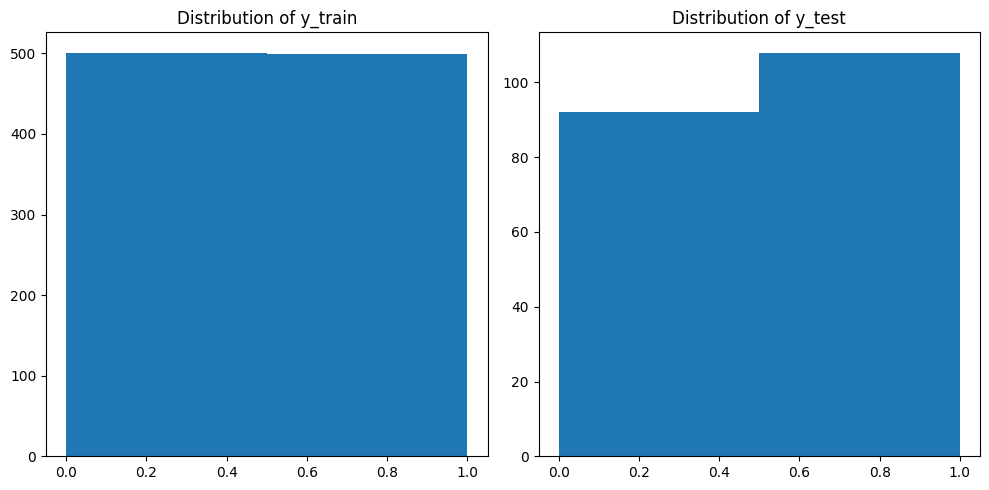

In [11]:
# Define input size
input_size = 10  # You can adjust this value as needed

# Define a function to generate synthetic data
def generate_data(num_samples=1000, input_size=input_size):
    # Create input features with random values from a normal distribution
    X = torch.randn(num_samples, input_size)
    # Create binary target labels based on whether the sum of input features is greater than zero
    y = (X.sum(dim=1) > 0).float().view(-1, 1)
    return X, y

# Generate training data with 1000 samples
X_train, y_train = generate_data(num_samples=1000, input_size=input_size)

# Generate test data with 200 samples
X_test, y_test = generate_data(num_samples=200, input_size=input_size)

# Move the training data to the appropriate device (CPU, CUDA, or MPS)
X_train, y_train = X_train.to(device), y_train.to(device)

# Move the test data to the appropriate device (CPU, CUDA, or MPS)
X_test, y_test = X_test.to(device), y_test.to(device)

# Let's examine our generated data
print("Training data:")
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("\nTest data:")
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# Let's look at a few samples
print("\nFirst 5 samples of X_train:")
print(X_train[:5])
print("\nFirst 5 labels of y_train:")
print(y_train[:5])

# We can visualize the distribution of our target variable
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.hist(y_train.cpu().numpy(), bins=2)
plt.title('Distribution of y_train')
plt.subplot(122)
plt.hist(y_test.cpu().numpy(), bins=2)
plt.title('Distribution of y_test')
plt.tight_layout()
plt.show()

# This synthetic dataset creates a binary classification problem
# The task is to predict whether the sum of input features is positive or negative

In this code, `generate_data` creates a dataset with a specified number of samples. Each sample consists of `input_size` features drawn from a standard normal distribution. The target label `y` is 1 if the sum of the input features is greater than zero, and 0 otherwise. This simple rule allows us to create a binary classification task.

We generate separate training and test datasets to evaluate the model's performance on unseen data. The training dataset contains 1000 samples, while the test dataset contains 200 samples. We also move the data to the appropriate device (CPU, CUDA, or MPS) for efficient computation.

## 5. Training an MLP

Training an MLP involves feeding it data, comparing its predictions to the true values, and adjusting its parameters to improve its predictions. This process is called backpropagation. During backpropagation, the network computes the gradients of the loss with respect to its parameters and updates the parameters using an optimization algorithm. This iterative process continues until the network's performance on the training data improves.

### Key Components of Training
- **Loss Function:** Measures how far off the model's predictions are from the true values.
- **Optimizer:** Adjusts the model's parameters to minimize the loss.
- **Training Loop:** Repeatedly feeds data through the model, computes the loss, and updates the parameters.

Epoch 1/50
Train Loss: 0.6378, Train Accuracy: 0.7770
Test Loss: 0.5697, Test Accuracy: 0.8750

Epoch 2/50
Train Loss: 0.4623, Train Accuracy: 0.9280
Test Loss: 0.3700, Test Accuracy: 0.9250

Epoch 3/50
Train Loss: 0.2661, Train Accuracy: 0.9590
Test Loss: 0.2271, Test Accuracy: 0.9400

Epoch 4/50
Train Loss: 0.1649, Train Accuracy: 0.9730
Test Loss: 0.1627, Test Accuracy: 0.9650

Epoch 5/50
Train Loss: 0.1167, Train Accuracy: 0.9750
Test Loss: 0.1246, Test Accuracy: 0.9750

Epoch 6/50
Train Loss: 0.0922, Train Accuracy: 0.9840
Test Loss: 0.1042, Test Accuracy: 0.9800

Epoch 7/50
Train Loss: 0.0761, Train Accuracy: 0.9900
Test Loss: 0.0960, Test Accuracy: 0.9800

Epoch 8/50
Train Loss: 0.0639, Train Accuracy: 0.9910
Test Loss: 0.0830, Test Accuracy: 0.9850

Epoch 9/50
Train Loss: 0.0561, Train Accuracy: 0.9960
Test Loss: 0.0793, Test Accuracy: 0.9850

Epoch 10/50
Train Loss: 0.0474, Train Accuracy: 0.9970
Test Loss: 0.0787, Test Accuracy: 0.9850

Epoch 11/50
Train Loss: 0.0425, Train A

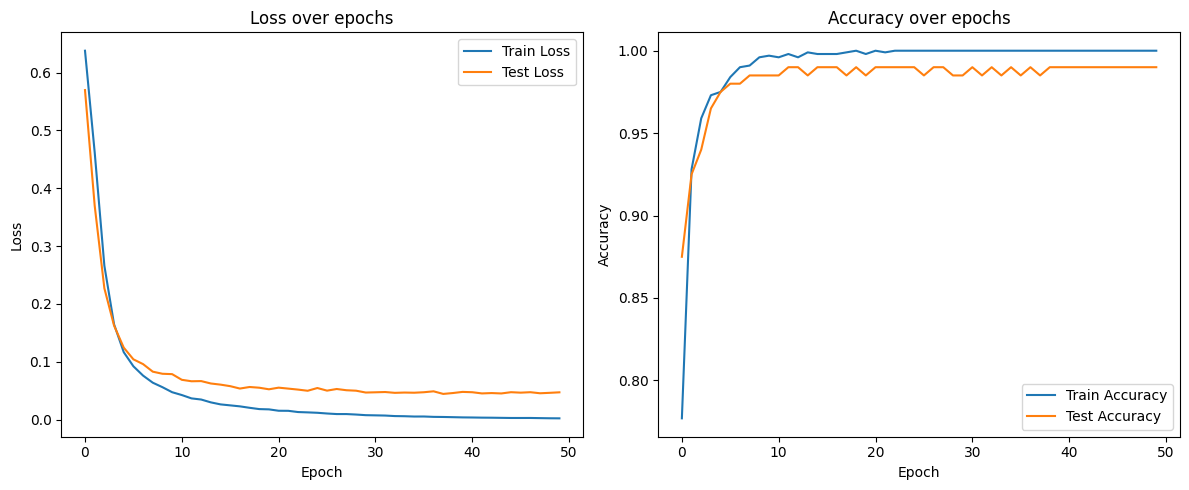

In [13]:
# Move the model to the appropriate device
mlp = mlp.to(device)

# Define the loss function (Binary Cross-Entropy with Logits Loss)
criterion = nn.BCEWithLogitsLoss()

# Define the optimizer (Adam) with a learning rate of 0.001
optimizer = optim.Adam(mlp.parameters(), lr=0.001)

# Set the number of epochs (iterations over the entire dataset) for training
num_epochs = 50

# Define batch size
batch_size = 32

# Create DataLoader for batching
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Lists to store metrics for plotting
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []

# Training loop
for epoch in range(num_epochs):
    # Set the model to training mode
    mlp.train()
    
    # Initialize variables to track training loss and accuracy
    train_loss = 0.0
    train_correct = 0
    
    # Iterate over batches of data from the training loader
    for batch_X, batch_y in train_loader:
        # Move batch data to the appropriate device
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # Zero the gradients to prevent accumulation
        optimizer.zero_grad()
        
        # Perform a forward pass to compute the model's predictions
        outputs = mlp(batch_X)
        
        # Compute the loss between the predictions and the true labels
        loss = criterion(outputs, batch_y)
        
        # Perform a backward pass to compute the gradients
        loss.backward()
        
        # Update the model's parameters using the optimizer
        optimizer.step()
        
        # Accumulate the training loss
        train_loss += loss.item()
        
        # Compute the number of correct predictions
        train_correct += ((outputs > 0) == batch_y).float().sum().item()
    
    # Compute average training loss and accuracy for this epoch
    train_loss /= len(train_loader)
    train_accuracy = train_correct / len(X_train)
    
    # Evaluate the model on the test set
    mlp.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation for evaluation
        test_outputs = mlp(X_test)
        test_loss = criterion(test_outputs, y_test).item()
        test_accuracy = ((test_outputs > 0) == y_test).float().mean().item()
    
    # Store the metrics for plotting
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)
    
    # Print the training and test metrics for the current epoch
    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")
    print()

# After training, let's visualize the learning curves
plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(test_accuracies, label='Test Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# This visualization helps us understand how our model's performance improved during training

In this training loop, we use the Binary Cross-Entropy with Logits Loss (BCEWithLogitsLoss) as the loss function, which is suitable for binary classification tasks. The Adam optimizer is used to update the model's parameters. During each epoch, we perform a forward pass to compute the model's predictions, a backward pass to compute the gradients, and an optimization step to update the parameters. We also evaluate the model on the test set every 10 epochs to monitor its performance.

> **Intuition:** Think of training as teaching the network. You show it examples (data), see how well it does (loss), and then give it feedback on how to improve (backpropagation).

> **Common Mistake:** Forgetting to zero out the gradients (optimizer.zero_grad()) before the backward pass. This can lead to incorrect gradient calculations and poor training.

## 6. Evaluating and Using the Trained MLP

After training, we need to evaluate how well our model performs on new, unseen data. This step is crucial because it allows us to assess the model's generalization ability, which is its performance on data it has never seen before. A model that performs well on the training data but poorly on new data is likely overfitting, meaning it has learned to memorize the training data rather than generalize from it.

In [14]:
# Evaluate the model on the test set
mlp.eval()  # Set the model to evaluation mode
with torch.no_grad():  # Disable gradient calculation for evaluation
    test_outputs = mlp(X_test)  # Perform a forward pass on the test data
    test_loss = criterion(test_outputs, y_test)  # Compute the loss on the test data
    accuracy = ((test_outputs > 0) == y_test).float().mean()  # Compute the accuracy on the test data
    
# Print the final test loss and accuracy
print(f"Final Test Loss: {test_loss:.4f}, Accuracy: {accuracy:.4f}")

# Make predictions on new data
new_data = torch.randn(5, input_size).to(device)  # Generate new random data and move to the appropriate device
with torch.no_grad():  # Disable gradient calculation for prediction
    predictions = mlp(new_data)  # Perform a forward pass on the new data
    binary_predictions = (predictions > 0).float()  # Convert raw predictions to binary predictions

# Print the predictions on new data
print("\nPredictions on new data:")
for i, (pred, binary_pred) in enumerate(zip(predictions, binary_predictions)):
    print(f"Sample {i+1}: Raw prediction = {pred.item():.4f}, Binary prediction = {binary_pred.item():.0f}")

# Let's visualize the decision boundary of our trained model
# We'll create a grid of points and see how our model classifies them

# Generate a grid of points
x = torch.linspace(-3, 3, 100)
y = torch.linspace(-3, 3, 100)
xx, yy = torch.meshgrid(x, y)
grid = torch.zeros(10000, 10).to(device)
grid[:, 0] = xx.flatten()
grid[:, 1] = yy.flatten()

# Make predictions on the grid points
with torch.no_grad():
    z = mlp(grid).view(100, 100).cpu()

# Plot the decision boundary
plt.figure(figsize=(10, 8))
plt.contourf(xx.cpu(), yy.cpu(), z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.colorbar()
plt.title('Decision Boundary')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the training data
plt.scatter(X_train[:, 0].cpu(), X_train[:, 1].cpu(), c=y_train.cpu(), cmap=plt.cm.RdYlBu, edgecolor='black')
plt.show()

# This visualization helps us understand how our model is making decisions
# The blue region represents where the model predicts 0, and the red region where it predicts 1
# The scattered points are our training data, colored according to their true labels

Final Test Loss: 0.0473, Accuracy: 0.9900

Predictions on new data:
Sample 1: Raw prediction = 15.2685, Binary prediction = 1
Sample 2: Raw prediction = -9.2060, Binary prediction = 0
Sample 3: Raw prediction = 35.0333, Binary prediction = 1
Sample 4: Raw prediction = -14.3250, Binary prediction = 0
Sample 5: Raw prediction = 38.1294, Binary prediction = 1


/home/playtorch_venv/lib/python3.12/site-packages/torch/functional.py:512: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3587.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


RuntimeError: mat1 and mat2 shapes cannot be multiplied (10000x2 and 10x64)

In the evaluation phase, we set the model to evaluation mode using `mlp.eval()` and disable gradient calculation with `torch.no_grad()`. This ensures that the model's parameters are not updated during evaluation. We then compute the test loss and accuracy to assess the model's performance. Finally, we make predictions on new data to see how the model generalizes to unseen inputs.

> **Intuition:** Evaluation is like giving your trained model a final exam. You test it on data it hasn't seen before to see how well it has learned to generalize.

> **Common Mistake:** Forgetting to set the model to evaluation mode (model.eval()). This can lead to incorrect results, especially if you're using layers like Dropout or BatchNorm.

## Advanced Topics and Best Practices

Here are some advanced topics and best practices to consider when working with MLPs in PyTorch. These techniques can help you improve the performance and robustness of your models:

- **Hyperparameter Tuning:** Use techniques like grid search, random search, or Bayesian optimization to find the best hyperparameters (e.g., learning rate, network architecture, dropout rate).

- **Regularization:** Implement L1/L2 regularization to prevent overfitting:

In [ ]:
optimizer = optim.Adam(mlp.parameters(), lr=0.001, weight_decay=1e-5)  # L2 regularization

- **Learning Rate Scheduling:** Implement learning rate decay to improve convergence:

In [ ]:
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

- **Early Stopping:** Implement early stopping to prevent overfitting:

In [ ]:
best_loss = float('inf')
patience = 10
counter = 0

for epoch in range(num_epochs):
    # ... training code ...
    
    if val_loss < best_loss:
        best_loss = val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch}")
            break

- **Model Saving and Loading:** Save and load your trained models:

In [ ]:
# Saving
torch.save(mlp.state_dict(), 'mlp_model.pth')

# Loading
mlp =MLP(input_size, hidden_sizes, output_size)
mlp.load_state_dict(torch.load('mlp_model.pth'))
mlp.eval()

- **Data Augmentation:** For image data, consider using data augmentation techniques:

In [ ]:
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
])

- **Transfer Learning:** For complex tasks, consider using pre-trained models and fine-tuning them for your specific task.

- **Gradient Clipping:** Implement gradient clipping to prevent exploding gradients:

In [ ]:
torch.nn.utils.clip_grad_norm_(mlp.parameters(), max_norm=1.0)

- **Proper Initialization:** Use appropriate weight initialization techniques:

In [ ]:
def init_weights(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0.01)

mlp.apply(init_weights)

- **Monitoring and Visualization:** Use tools like TensorBoard or Weight & Biases to monitor and visualize your training process.

## Conclusion

We've covered the basics of PyTorch and Multi-Layer Perceptrons, from tensors and basic operations to building, training, and evaluating a neural network. Remember, practice is key to mastering these concepts. Don't be afraid to experiment and make mistakes - that's how you learn! By understanding the underlying principles and applying best practices, you can build powerful and efficient neural networks for a wide range of tasks.

Happy coding and machine learning!